**Assignment 10**

**Name : Ramakrishna Reddy Are**

**Roll No. : 197212**

**Section : BTech III year CSE-B**

**Date : 10-04-2022**



---



**Implementation of Linear Discriminant Analysis (LDA)**


---



In [ ]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

***Importing the dataset [iris.data](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)***

In [ ]:
# Loading dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(dataset)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
dataset.shape

(150, 5)

In [ ]:
X = dataset.iloc[:,0:4]            
Y = dataset.iloc[:,-1]              
print(X)                            
print(Y)           

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: obje

***Grouping the data into its respective classes***

In [ ]:
# Grouping the data into its respective classes
grp = dataset.groupby('target')
for name, group in grp:
    print(name)
    print(group)

Iris-setosa
    sepal length  sepal width  petal length  petal width       target
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13      

***Calculating mean vector of given data of K-dimensions excluding the target class***

In [ ]:
totalmean=dataset.iloc[:,:-1].mean()      # mean vector
print(totalmean)

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64


***Calculating class-wise mean vector for the given training data***

In [ ]:
classwisemean=grp.mean()                  # classwise mean
print(classwisemean)

                 sepal length  sepal width  petal length  petal width
target                                                               
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


***Calculating scatter matrices needed to maximize the difference between means of given classes and minimize the variance of given classes.***

In [ ]:
within_class_scatter_matrix=np.zeros([X.shape[1],X.shape[1]])       # initializing within class scatter matrix
for name,group in grp:                                              # finding within class scatter matrix
  temp=group.drop('target',axis=1)
  within_class_scatter_matrix += (temp-classwisemean.loc[name]).T.dot((temp-classwisemean.loc[name])) # calculating within class scatter matrix
print(within_class_scatter_matrix)                                  # printing within class scatter matrix

#finding the between class scatter matrix
between_class_scatter_matrix=np.zeros([X.shape[1],X.shape[1]])     # initializing between class scatter matrix
for rows in range(classwisemean.shape[0]):
  between_class_scatter_matrix += grp.get_group(classwisemean.iloc[rows].name).shape[0] * (classwisemean.iloc[rows]-totalmean).T.dot((classwisemean.iloc[rows]-totalmean))
print(between_class_scatter_matrix)                                # printing the between class scatter matrix

              sepal length  sepal width  petal length  petal width
sepal length       38.9562      13.6830       24.6140       5.6556
sepal width        13.6830      17.0350        8.1200       4.9132
petal length       24.6140       8.1200       27.2200       6.2536
petal width         5.6556       4.9132        6.2536       6.1756
[[591.4376 591.4376 591.4376 591.4376]
 [591.4376 591.4376 591.4376 591.4376]
 [591.4376 591.4376 591.4376 591.4376]
 [591.4376 591.4376 591.4376 591.4376]]


***Calculating eigen values of M and get eigen vector pairs for first n (needed ) dimensions.***

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix)) # calculating the eigen values and eigen vectors
print("Eigen Values : ","\n",eigen_values)
print("Eigen Vectors : ","\n",eigen_vectors)

Eigen Values :  
 [ 1.42108547e-14  9.77669909e+01  2.88586666e-15 -2.59964517e-15]
Eigen Vectors :  
 [[-0.73551924  0.00375503 -0.00304764  0.00119198]
 [ 0.07357881 -0.10860203  0.7403312   0.67426261]
 [-0.01145863  0.0169129  -0.06855271  0.06054966]
 [ 0.67339907 -0.99393433 -0.66873085 -0.73600425]]


In [ ]:
# Sorting the eigen values and their corresponding eigen vectors
indx=np.argsort(eigen_values)                       # finding the indexes of eigen values in sorted order
indx=indx[::-1]                                     # arranging the indexes in descending order
eigen_values=eigen_values[indx]
eigen_vectors=eigen_vectors[:,indx]
print("Eigen Values in Sorted Order ")              
print(eigen_values)
print("Eigen Vectors in Sorted Order ")
print(eigen_vectors)

Eigen Values in Sorted Order 
[ 9.77669909e+01  1.42108547e-14  2.88586666e-15 -2.59964517e-15]
Eigen Vectors in Sorted Order 
[[ 0.00375503 -0.73551924 -0.00304764  0.00119198]
 [-0.10860203  0.07357881  0.7403312   0.67426261]
 [ 0.0169129  -0.01145863 -0.06855271  0.06054966]
 [-0.99393433  0.67339907 -0.66873085 -0.73600425]]


In [ ]:
j=1
for i in range(len(eigen_values)-1,-1,-1) :
    print("Explained variance for principle component {} = {}".format(j,eigen_values[i]/np.sum(eigen_values)))
    j+=1;

Explained variance for principle component 1 = -2.6590213575180975e-17
Explained variance for principle component 2 = 2.951780181386498e-17
Explained variance for principle component 3 = 1.4535432233691747e-16
Explained variance for principle component 4 = 0.9999999999999999


In [ ]:
# Choose first 2 eigen vectors
choosen_eigenvectors=eigen_vectors[:,0:2]
print("Choosen Eigen Vectors")                    
print(choosen_eigenvectors)

# Transforming the samples onto the new subspace.
data=np.matmul(X,choosen_eigenvectors)
transformed_data=pd.DataFrame({"LDA1":data.iloc[:,0],"LDA2":data.iloc[:,1],"Species":Y})
print(transformed_data)

Choosen Eigen Vectors
[[ 0.00375503 -0.73551924]
 [-0.10860203  0.07357881]
 [ 0.0169129  -0.01145863]
 [-0.99393433  0.67339907]]
         LDA1      LDA2         Species
0   -0.536065 -3.374985     Iris-setosa
1   -0.482515 -3.264670     Iris-setosa
2   -0.506678 -3.101705     Iris-setosa
3   -0.492811 -3.037802     Iris-setosa
4   -0.547301 -3.294075     Iris-setosa
..        ...       ...             ...
145 -2.498749 -3.218010  Iris-virginica
146 -2.051759 -3.227659  Iris-virginica
147 -2.201320 -3.272925  Iris-virginica
148 -2.540685 -2.823110  Iris-virginica
149 -2.006477 -2.965148  Iris-virginica

[150 rows x 3 columns]


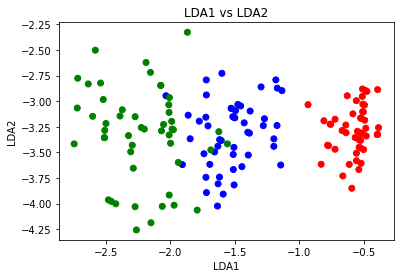

In [ ]:
# plotting the data
def getcolor(Y):
  l=[]
  for i in range(len(Y)):
    if(Y[i]=='Iris-setosa'): 
      l.append('red')
    elif(Y[i]=='Iris-versicolor'):
      l.append('blue')
    else: 
      l.append('green')
  return l
# plotting test data
plt.scatter(transformed_data['LDA1'],transformed_data['LDA2'], color = getcolor(Y))    
plt.title('LDA1 vs LDA2')    
plt.xlabel('LDA1')                                                                   
plt.ylabel('LDA2')
plt.show()                                                                           # plotting the graph                  
# we get better prdiction if we take only one eigen vector as it has much explained variance                                                                                                 # plotting the graph



---



**Logistic Regression by using LDA**


---



In [ ]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Importing the dataset Wine.csv***

In [ ]:
# loading dataset
dataset=pd.read_csv("Wine.csv")
dataset=dataset.dropna()

In [ ]:
dataset.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
X = dataset.iloc[:,:-1]            
Y = dataset.iloc[:,-1]              
print(X)                            
print(Y)           

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [ ]:
# Scale the dataset [Standardization of the data]
def standardize(X):
  m=X.shape[0]
  n=X.shape[1]
  k=0
  for i in X.columns:
    mean=0                                                        # for mean of each column
    sd=0                                                          # for standard deviation of each column
    mean = np.mean(X[i])                                          # finding mean of each column
    sd = np.sum((X[i]-mean)**2)                          
    sd=sd/(m)
    sd = np.sqrt(sd)                                              # finding standard deviation of each column
    for j in range(m):
      cell=X.iat[j,k]
      X.iat[j,k]=(cell-mean)/sd                                   # replacing the data in the dataset with standardized value
    k+=1
  return X

In [ ]:
X_scaled=standardize(X) 
X_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # importing libraries for LDA
lda = LDA(n_components=2)
X=lda.fit_transform(X,Y)
print(X) 

[[-4.70024401  1.97913835]
 [-4.30195811  1.17041286]
 [-3.42071952  1.42910139]
 [-4.20575366  4.00287148]
 [-1.50998168  0.4512239 ]
 [-4.51868934  3.21313756]
 [-4.52737794  3.26912179]
 [-4.14834781  3.10411765]
 [-3.86082876  1.95338263]
 [-3.36662444  1.67864327]
 [-4.80587907  2.23536271]
 [-3.42807646  2.17510939]
 [-3.66610246  2.26248961]
 [-5.58824635  2.05478773]
 [-5.50131449  3.61304865]
 [-3.18475189  2.88952528]
 [-3.28936988  2.76584266]
 [-2.99809262  1.42511132]
 [-5.24640372  3.70982655]
 [-3.13653106  1.97689922]
 [-3.57747791  0.5624599 ]
 [-1.69077135  0.91342136]
 [-4.83515033  0.9147628 ]
 [-3.09588961  0.61735888]
 [-3.32164716  0.29847734]
 [-2.14482223  0.16369247]
 [-3.9824285   2.17515679]
 [-2.68591432  1.21850924]
 [-3.56309464  1.03817651]
 [-3.17301573  1.37789624]
 [-2.99626797  1.32419896]
 [-3.56866244  2.34065478]
 [-3.38506383  0.20123426]
 [-3.5275375   1.71592739]
 [-2.85190852  1.47070771]
 [-2.79411996  0.23793093]
 [-2.75808511  1.56970421]
 

In [ ]:
transformed_data=pd.DataFrame({"LDA1":X[:,0],"LDA2":X[:,1],"Customer_Segment":Y}) # creating dataframe for transformed data
print(transformed_data)

         LDA1      LDA2  Customer_Segment
0   -4.700244  1.979138                 1
1   -4.301958  1.170413                 1
2   -3.420720  1.429101                 1
3   -4.205754  4.002871                 1
4   -1.509982  0.451224                 1
..        ...       ...               ...
173  4.291508  3.390332                 3
174  4.503296  2.083546                 3
175  5.047470  3.196231                 3
176  4.276155  2.431388                 3
177  5.538086  3.042057                 3

[178 rows x 3 columns]


In [ ]:
# Applying logistic regression for transformed data
X=transformed_data.iloc[:,:-1].values  
Y=transformed_data.iloc[:,-1].values

In [ ]:
# Now splitting the dataset
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

In [ ]:
#printing data
print("X Train","\n",X_train)
print("Y Train","\n",Y_train)
print("X Test","\n",X_test)
print("Y Test","\n",Y_test)

X Train 
 [[ 3.09975377  1.94106484]
 [ 0.91972331 -2.24859665]
 [ 0.49411386 -2.93631076]
 [ 4.50329623  2.08354592]
 [-3.32164716  0.29847734]
 [-2.99626797  1.32419896]
 [-0.59102937 -2.93845393]
 [ 0.02594549 -2.35411388]
 [ 0.99837397 -3.44598675]
 [-3.13653106  1.97689922]
 [ 3.71583899  0.5651013 ]
 [-0.34721117 -1.48810682]
 [ 3.78325562  2.00739304]
 [-3.28936988  2.76584266]
 [ 3.28527755  0.69608625]
 [ 3.54993389  0.9159633 ]
 [-2.92065533  0.25523343]
 [ 5.61316558  2.98439332]
 [-4.83515033  0.9147628 ]
 [ 0.22550192 -3.79734159]
 [ 5.04747033  3.19623136]
 [ 3.04411324  0.9812437 ]
 [-1.07718925 -1.82670118]
 [ 3.35888137  0.54868961]
 [ 5.04368277  2.5119033 ]
 [-2.68591432  1.21850924]
 [ 2.03482711 -0.79032003]
 [ 3.45088333 -0.21734536]
 [-1.00534818 -3.33112586]
 [ 1.79755252 -0.85012177]
 [ 3.04007194  1.45698898]
 [-0.45917726 -1.19045365]
 [-3.42071952  1.42910139]
 [ 1.58618749 -2.42384416]
 [-1.62614426 -2.02049545]
 [ 2.00044562 -0.63448464]
 [-1.23036133  0.4

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
# Training the Logistic Regression with the Training Data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
# predicting the test data
Y_pred=classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
# Making the Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix","\n",cm)
print("Accuracy : ",accuracy_score(Y_test,Y_pred))

Confusion Matrix 
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Accuracy :  1.0




---

